# Synthesis Experiments

In [34]:
%matplotlib inline

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as pltp
from matplotlib.animation import FuncAnimation, PillowWriter
from numpy import exp, pi, array, asarray
from sympy.solvers import solve
from sympy import Symbol, Ellipse, Point, Line, Matrix, diff


## Example of the system

Initial parameters of the model

In [36]:
w = 1                                       # Angular velocity
t_begin = 0                                 # Time constants
steps = 100
t_end = np.abs(4 * np.pi / w)


alpha = np.pi/4                                  # Angle between centers of circles
l = .1                                      # Distance between nearest points of circles
R1, R2 = 1, 1.5

center1 = Point(0, 0)                            
center2 = Point(
    center1[0] + (R1 + R2 + l)*np.cos(alpha), 
    center1[1] + (R1 + R2 + l)*np.sin(alpha)
)
                                             

d1, d2 = 0.8, 1.4                                  # Distances from center to joints
phi1, phi2 = 0, np.pi                              # Angle of initial position
act_len = 2                                        # Length of actuator

Simulation

In [37]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
xdata, ydata = [], []
ln, = plt.plot([], [], 'g--')

trace = []
points = []

prismatic_bar = plt.plot([], [], 'r-')
actuator_bar = plt.plot([], [], 'black')

def init_frame():
    x_min = float(min(center1.x - R1, center2.x - R2) - act_len - 0.5)
    x_max = float(max(center1.x + R1, center2.x + R2) + act_len + 0.5)
    y_min = float(min(center1.y - R1, center2.y - R2) - act_len - 0.5)
    y_max = float(max(center1.y + R1, center2.y + R2) + act_len + 0.5)
    
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    circle1 = pltp.Circle((center1.x, center1.y), R1, linestyle='--', color='b',fill=False)
    circle2 = pltp.Circle((center2.x, center2.y), R2, linestyle='--', color='b', fill=False)
    ax.add_patch(circle1)
    ax.add_patch(circle2)

    plt.plot(center1.x, center1.y, 'bo')
    plt.plot(center2.x, center2.y, 'bo')

    return ln,

# animation update on every frame
def update_frame(frame):
    for i in range(len(points)):
        points[i][0].remove()
    points.clear()

    t = frame
    p1 = Point(center1.x + d1 * np.cos(w * t + phi1), center1.y + d1 * np.sin(w * t + phi1))
    p2 = Point(center2.x + d2 * np.cos(w * t + phi2), center2.y + d2 * np.sin(w * t + phi2))
    dist = np.sqrt((float(p1.x) - float(p2.x)) ** 2 + (float(p1.y) - float(p2.y)) ** 2)
    new_len = dist + act_len
    p3 = Point(new_len / dist * (p2 - p1) + p1)

    points.append(plt.plot(p1.x, p1.y, 'ro'))
    points.append(plt.plot(p2.x, p2.y, 'ro'))
    points.append(plt.plot(p3.x, p3.y, 'go'))

    prismatic_bar[0].set_data([p1.x, p2.x], [p1.y, p2.y])
    actuator_bar[0].set_data([p2.x, p3.x], [p2.y, p3.y])

    trace.append([p3.x, p3.y])
    ln.set_data([x[0] for x in trace], [x[1] for x in trace])
    return ln,

# create animation
anim = FuncAnimation(fig, update_frame, init_func=init_frame, frames=np.linspace(t_begin, t_end, steps), blit=True)

# save animation to the file
anim.save('assets/exp1.gif', dpi=100, writer=PillowWriter(fps=60))
plt.close('all')
# plt.show()
# prevent unclosed plots

# Analytical solution

In [38]:
def get_act(p1, p2, act_len):
    '''Get coordinates of the actuator based on two joints' positions'''
    dist = sp.sqrt((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2)
    new_len = dist + act_len
    p12 = Point(new_len / dist * (p2 - p1) + p1)
    return p12

In [39]:
t_begin = 0
steps = 100
t_end = np.abs(4 * np.pi / w)
dt = (t_end - t_begin) / steps
ts = np.linspace(t_begin, t_end, steps)
t = sp.Symbol('t')

delta12 = (12, 0,)               # Distance between two mechanisms

w1 = np.pi
a1 = 5*np.pi/6                                  
l1 = .1                                      
R11, R12 = 1, 1.5
center11 = Point(0, 0)                            
center12 = Point(
    center11[0] + (R11 + R12 + l1)*np.cos(a1), 
    center11[1] + (R11 + R12 + l1)*np.sin(a1)
)
d11, d12 = 0.8, 1.4                                  
phi11, phi12 = 0, np.pi                              
act_len1 = 2


w2 = -1
a2 = 2*np.pi/3                                  
l2 = 0                                      
R21, R22 = 1, 1.5
center21 = Point(delta12[0], delta12[1])                            
center22 = Point(
    center21[0] + (R21 + R22 + l2)*np.cos(a2), 
    center21[1] + (R21 + R22 + l2)*np.sin(a2)
)
d21, d22 = 0.8, 1.4                                  
phi21, phi22 = np.pi, 0                              
act_len2 = 2

# center1 = Point(0, 0)
# center2 = Point(0, 2.5)
# R1 = 1
# R2 = 1.5

# d1 = 0.8
# phi1 = 0
# d2 = 1.4
# phi2 = 3 * np.pi / 4
# act_len1 = 2



# center3 = Point(11, 0)
# center4 = Point(11, 2.5)
# R3 = 1
# R4 = 1.5

# d3 = 0.8
# phi3 = np.pi
# d4 = 1.4
# phi4 = 0
# act_len2 = 2


In [40]:
# Position of revolute joints and end effectors
rev1 = Point(center11.x + d11 * sp.cos(w1 * t + phi11), center11.y + d11 * sp.sin(w1 * t + phi11))
rev2 = Point(center12.x + d12 * sp.cos(w1 * t + phi12), center12.y + d12 * sp.sin(w1 * t + phi12))
ee1 = get_act(rev1, rev2, act_len1)

rev3 = Point(center21.x + d21 * sp.cos(w2 * t + phi21), center21.y + d21 * sp.sin(w2 * t + phi21))
rev4 = Point(center22.x + d22 * sp.cos(w2 * t + phi22), center22.y + d22 * sp.sin(w2 * t + phi22))
ee2 = get_act(rev3, rev4, act_len2)

In [41]:
# Calculating angles of rods
rod_angle1 = sp.atan2(rev2.y - rev1.y, rev2.x - rev1.x)
rod_angle2 = sp.atan2(rev4.y - rev3.y, rev4.x - rev3.x)

In [42]:
# Precalculate all trajectories via substitution
rev1s = []
rev2s = []
ee1s = []
rev3s = []
rev4s = []
ee2s = []
ra1s = []
ra2s = []

for frame in ts:
    rev1s.append(rev1.subs(t, frame))
    rev2s.append(rev2.subs(t, frame))
    ee1s.append(ee1.subs(t, frame))
    rev3s.append(rev3.subs(t, frame))
    rev4s.append(rev4.subs(t, frame))
    ee2s.append(ee2.subs(t, frame))
    ra1s.append(rod_angle1.subs(t, frame))
    ra2s.append(rod_angle2.subs(t, frame))

rev1s = np.array(rev1s, dtype=np.float64)
rev2s = np.array(rev2s, dtype=np.float64)
ee1s = np.array(ee1s, dtype=np.float64)
rev3s = np.array(rev3s, dtype=np.float64)
rev4s = np.array(rev4s, dtype=np.float64)
ee2s = np.array(ee2s, dtype=np.float64)
ra1s = np.array(ra1s, dtype=np.float64)
ra2s = np.array(ra2s, dtype=np.float64)

In [43]:
# Precisely calculate end-effector trajectory
# For better velocity calculation
# Not necessary

ee1s_precise = []
ee2s_precise = []
precision_dt = 0.07
precision_steps = int((t_end - t_begin) / precision_dt)

cur_time = 0
for _ in range(precision_steps):
    ee1s_precise.append(ee1.subs(t, cur_time))
    if len(ee1s_precise) > 1 and ee1s_precise[-1] == ee1s_precise[0]:
        break
    cur_time += precision_dt
for _ in range(precision_steps):
    ee2s_precise.append(ee2.subs(t, cur_time))
    if len(ee2s_precise) > 1 and ee2s_precise[-1] == ee2s_precise[0]:
        break
    cur_time += precision_dt

ee1s_precise = np.array(ee1s_precise, dtype=np.float64)
ee2s_precise = np.array(ee2s_precise, dtype=np.float64)

In [44]:
# Find positions for throw as a point where derivative changes its sign

throw1 = []
throw2 = []

maxv1 = 0.0
maxv2 = 0.0

throw_time1 = 0.0
throw_time2 = 0.0

idx1 = 0
idx2 = 0

for i in range(len(ts)):
    maxv1 = max(maxv1, np.linalg.norm(ee1s[i] - ee1s[i-1]))
    maxv2 = max(maxv2, np.linalg.norm(ee2s[i] - ee2s[i-1]))

for i in range(len(ts)):
    if np.linalg.norm(ee1s[i] - ee1s[i - 1]) == maxv1:
        idx1 = i
        throw_time1 = ts[i]
        throw1 = ee1s[i]
        break

for i in range(len(ts)):
    if np.linalg.norm(ee2s[i] - ee2s[i - 1]) == maxv2:
        idx2 = i
        throw_time2 = ts[i]
        throw2 = ee2s[i]
        break

In [45]:
maxv1 = 4

In [46]:
throw_angle1 = ra1s[idx1] - np.pi/2
throw_angle2 = ra2s[idx2] - np.pi/2

print(f"Throw angles are: {throw_angle1 / np.pi}*pi and {throw_angle2 / np.pi}*pi")

Throw angles are: 0.10422276745370855*pi and 0.23917515187370308*pi


In [47]:
def ballistics(v0, alpha, r0):
    g = 6
    v_x, v_y = v0*np.cos(alpha), v0*np.sin(alpha)
    t_flight = (-v_y - np.sqrt(v_y**2 + 2*g*r0[1])) / (-g)
    S = v_x * t_flight
    
    return (
        lambda t: r0[0] + v_x*t,                     # r_x
        lambda t: r0[1] + v_y*t-g*t**2/2,            # r_y
        lambda t: v_x*t,                             # v_x      
        lambda t: v_y-g*t,                           # v_y        
        t_flight, 
        S
    )

In [48]:
def draw_vector(ax, X, Y, U, V, color):
  """Wrapper for drawing the proportional vectors"""
  return ax.quiver(X, Y, U, V, 
                   color = color, angles='xy', scale_units='xy',scale=1)

In [49]:
x_launch, y_launch, vx_launch, vy_launch, _, _ = ballistics(maxv1, throw_angle1, throw1)

## Constructing the trajectory

Choosing points

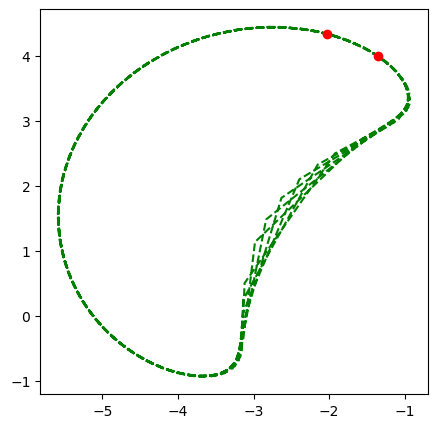

In [50]:
parabola_points = (ee1s[25], ee1s[26])
fig, ax = plt.subplots(figsize = (5, 5))
ax.plot(ee1s_precise[:, 0], ee1s_precise[:, 1], 'g--')
for point in parabola_points:
    ax.plot(point[0], point[1], 'ro')

Evaluating the coefficients

In [51]:
g = 9.81
b,c = sp.symbols('b,c')

res = sp.solve([
    - (g*parabola_points[0][0]**2)/2 + b*parabola_points[0][0] + c - parabola_points[0][1],
    -(g*parabola_points[1][0]**2)/2 + b*parabola_points[1][0] + c - parabola_points[1][1]  
])


parabola = lambda x: -g/2 * x**2 + float(res[b])*x + float(res[c])
print(parabola(parabola_points[0][0]), parabola_points[0][1])

4.002616960678578 4.00261696067854


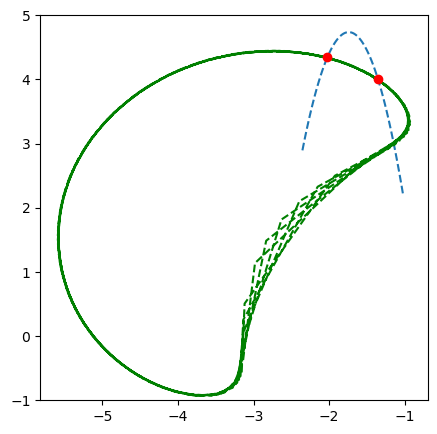

In [52]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.set_ylim(-1, 5)
dx = np.linspace((parabola_points[0][0]-1), parabola_points[1][0]+1, 100)

ax.plot(dx, parabola(dx), '--')
ax.plot(ee1s_precise[:, 0], ee1s_precise[:, 1], 'g--')
for point in parabola_points:
    ax.plot(point[0], point[1], 'ro')

In [53]:
center22.evalf()

Point2D(10.7500000000000, 2.16506350946110)

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = np.array(ax)
ax = ax.flatten()
ax[0].set_aspect('equal')
xdata, ydata = [], []
ln, = plt.plot([], [], 'g--')

points = []

draw_launch = False
t_launch = 0
launch_points_x = []
launch_points_y = []

prismatic_bar1 = ax[0].plot([], [], 'r-')
actuator_bar1 = ax[0].plot([], [], 'black')

prismatic_bar2 = ax[0].plot([], [], 'r-')
actuator_bar2 = ax[0].plot([], [], 'black')

prismatic_bar3 = ax[3].plot([], [], 'r-')
actuator_bar3 = ax[3].plot([], [], 'black')

trace1, = ax[0].plot(ee1s_precise[:, 0], ee1s_precise[:, 1], 'g--')
trace2, = ax[0].plot(ee2s_precise[:, 0], ee2s_precise[:, 1], 'g--')
trace3, = ax[3].plot(ee1s_precise[:, 0], ee1s_precise[:, 1], 'g--')
v1_points = [0.0]
v2_points = [0.0]
vs1, = ax[1].plot([], [], label='Velocity (left)')
vs2, = ax[1].plot([], [], label='Velocity (right)')

for i in range(1, len(ts)):
    v1_points.append(np.linalg.norm(ee1s[i] - ee1s[i - 1]))
    v2_points.append(np.linalg.norm(ee2s[i] - ee2s[i - 1]))

frames = []

alpha1_points = []
alpha2_points = []

alpha1, = ax[2].plot([], [], label='End-Effector Angle (left)')
alpha2, = ax[2].plot([], [], label='End-Effector Angle (right)')
launch_traj, = ax[3].plot([], [], '--', color='yellow')
def init_frame():
    x1_min = float(min(center11.x - R11, center12.x - R12, center21.x - R21, center22.x - R22) - act_len - 0.5)
    x1_max = float(max(center11.x + R11, center12.x + R12, center21.x + R21, center22.x + R22) + act_len + 0.5)
    y1_min = float(min(center11.y - R11, center12.y - R12, center21.x - R21, center22.x - R22) - act_len - 0.5)
    y1_max = float(max(center11.y + R11, center12.y + R12, center21.y + R21, center22.y + R22) + act_len + 0.5)

    ax[0].set_xlim(x1_min, x1_max)
    ax[0].set_ylim(y1_min, y1_max)

    circle11 = pltp.Circle((center11.x, center11.y), R11, linestyle='--', color='b',fill=False)
    circle12 = pltp.Circle((center12.x, center12.y), R12, linestyle='--', color='b', fill=False)

    circle21 = pltp.Circle((center21.x, center21.y), R21, linestyle='--', color='b',fill=False)
    circle22 = pltp.Circle((center22.x, center22.y), R22, linestyle='--', color='b', fill=False)
    
    ax[0].add_patch(circle11)
    ax[0].add_patch(circle12)
    
    p12 = ee1s[len(frames) - 1]

    ax[0].add_patch(circle21)
    ax[0].add_patch(circle22)

    ax[0].plot(center11.x, center11.y, 'bo')
    ax[0].plot(center12.x, center12.y, 'bo')

    ax[0].plot(center21.x, center21.y, 'bo')
    ax[0].plot(center22.x, center22.y, 'bo')

    ax[0].plot(throw1[0], throw1[1], 'go')
    ax[0].plot(throw2[0], throw2[1], 'go')

    ax[0].set_axis_off()

    ax[1].set_xlim(t_begin, t_end)
    ax[1].set_ylim(0, 2)

    ax[1].set_xlabel('t (s)')
    ax[1].set_ylabel('v(t) (m/s)')
    ax[1].grid(True)

    ax[2].set_xlim(t_begin, t_end)
    ax[2].set_ylim(-1, 2 * np.pi + 1)
    ax[2].set_xlabel('t')
    ax[2].set_ylabel('$\phi({t})$')
    ax[2].grid(True)

    x3_min = float(min(center11.x - R11, center12.x - R12) - act_len - 0.5)
    x3_max = float(max(center11.x + R11, center12.x + R12) + act_len + 0.5)
    y3_min = float(min(center11.y - R11, center12.y - R12) - act_len - 0.5)
    y3_max = float(max(center11.y + R11, center12.y + R12) + act_len + 0.5)

    ax[3].set_xlim(x3_min, x3_max)
    ax[3].set_ylim(y3_min, y3_max)

    circle11 = pltp.Circle((center11.x, center11.y), R11, linestyle='--', color='b',fill=False)
    circle12 = pltp.Circle((center12.x, center12.y), R12, linestyle='--', color='b', fill=False)
    ax[3].add_patch(circle11)
    ax[3].add_patch(circle12)
    ax[3].plot(center11.x, center11.y, 'bo')
    ax[3].plot(center12.x, center12.y, 'bo')
    ax[3].plot(throw1[0], throw1[1], 'go')
    ax[3].set_axis_off()



    return ln,

def belong_to_axes(ax, p):
    return ax.get_xlim()[0] < p[0] < ax.get_xlim()[1] and ax.get_ylim()[0] < p[1] < ax.get_ylim()[1]

# animation update on every frame
def update_frame(frame):
    global draw_launch, t_launch, launch_points_x, launch_points_y
    for i in range(len(points)):
        points[i][0].remove()
    points.clear()

    frames.append(frame)

    # Plot first mechanism

    p1 = rev1s[len(frames) - 1]
    p2 = rev2s[len(frames) - 1]
    p12 = ee1s[len(frames) - 1]

    points.append(ax[0].plot(p1[0], p1[1], 'ro'))
    points.append(ax[0].plot(p2[0], p2[1], 'ro'))
    points.append(ax[0].plot(p12[0], p12[1], 'go'))

    prismatic_bar1[0].set_data([p1[0], p2[0]], [p1[1], p2[1]])
    actuator_bar1[0].set_data([p2[0], p12[0]], [p2[1], p12[1]])

    vs1.set_data([x for x in frames], [x for x in v1_points[:len(frames)]])
    vs2.set_data([x for x in frames], [x for x in v2_points[:len(frames)]])

    # Calculate angles

    # alpha1_points.append(((w1 * frame + phi1) % (2 * np.pi)) * np.sign(w1))
    alpha1_points.append(ra1s[len(frames) - 1])
    alpha1.set_data(frames, alpha1_points)

    p3 = rev3s[len(frames) - 1]
    p4 = rev4s[len(frames) - 1]
    p34 = ee2s[len(frames) - 1]

    points.append(ax[0].plot(p3[0], p3[1], 'ro'))
    points.append(ax[0].plot(p4[0], p4[1], 'ro'))
    points.append(ax[0].plot(p34[0], p34[1], 'go'))

    prismatic_bar2[0].set_data([p3[0], p4[0]], [p3[1], p4[1]])
    actuator_bar2[0].set_data([p4[0], p34[0]], [p4[1], p34[1]])


    # Calculate angles

    # alpha2_points.append(((w2 * frame + phi3) % (2 * np.pi)))
    alpha2_points.append(ra2s[len(frames) - 1])
    alpha2.set_data(frames, alpha2_points)

    # Plotting thrower/catcher 

    # Plot the mechanism
    p1 = rev1s[len(frames) - 1]
    p2 = rev2s[len(frames) - 1]
    p12 = ee1s[len(frames) - 1]

    points.append(ax[3].plot(p1[0], p1[1], 'ro'))
    points.append(ax[3].plot(p2[0], p2[1], 'ro'))
    points.append(ax[3].plot(p12[0], p12[1], 'go'))

    prismatic_bar3[0].set_data([p1[0], p2[0]], [p1[1], p2[1]])
    actuator_bar3[0].set_data([p2[0], p12[0]], [p2[1], p12[1]])

    vs1.set_data([x for x in frames], [x for x in v1_points[:len(frames)]])
    
    # Plot throw trajectory
    eps = 1e-2
    if (throw1[0] - p12[0])**2 + (throw1[1] - p12[1])**2 < eps:
        draw_launch = True
        t_launch = frame
        
    if draw_launch:
        dt = frame-t_launch
        cur_pos = np.array([x_launch(dt), y_launch(dt)])
        launch_points_x.append(cur_pos[0])
        launch_points_y.append(cur_pos[1])
        launch_traj.set_data(launch_points_x, launch_points_y)

        points.append(ax[3].plot(cur_pos[0], cur_pos[1], 'bo'))
        
        if not belong_to_axes(ax[3], cur_pos):
            launch_traj.set_data([], [])
            draw_launch = False
            t_launch = 0
            launch_points_x = []
            launch_points_y = []

    return ln,


ax[1].legend()
ax[2].legend()
# create animation
anim = FuncAnimation(fig, update_frame, init_func=init_frame, frames=ts, blit=True)

# save animation to the file
anim.save('assets/exp2.gif', dpi=100, writer=PillowWriter(fps=60))
plt.close('all')
# plt.show()
# prevent unclosed plots

# Ballistic

In [55]:
v0 = 0.7153677469167853
alpha = np.pi/6
d = 10

In [56]:
def ballistics(v0, alpha, d):
    g = 9.81
    v_x, v_y = v0*np.cos(alpha), v0*np.sin(alpha)
    t_flight = (-v_y - np.sqrt(v_y**2 + 2*g*d)) / (-g)
    S = v_x * t_flight
    return (
        lambda t: v_x*t,                         # r_x
        lambda t: d + v_y*t-g*t**2/2,            # r_y
        lambda t: v_x*t,                      # v_x      
        lambda t: v_y-g*t,                      # v_y        
        t_flight, 
        S
    )

In [57]:
def draw_vector(ax, X, Y, U, V, color):
  """Wrapper for drawing the proportional vectors"""
  return ax.quiver(X, Y, U, V, 
                   color = color, angles='xy', scale_units='xy',scale=1)

In [58]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

x, y, v_x, v_y, t_flight, S = ballistics(v0, alpha, d)
t = np.linspace(0, t_flight, 100)
xdata, ydata = x(t), y(t)
vxdata, vydata = np.ones_like(t)*v_x(0), v_y(t)
print(vxdata.shape, vydata.shape)
ln, = plt.plot([], [], 'g--') 
velocities = []

prismatic_bar = plt.plot([], [], 'r-')
actuator_bar = plt.plot([], [], 'black')

def init_frame():
    ax.set_xlim(-1, xdata[-1]+1)
    ax.set_ylim(0, ydata.max()+1)
    plt.plot(xdata, ydata, linestyle='--', linewidth='1')
    
    return ln,

# animation update on every frame
def update_frame(frame):
    for i in range(len(points)):
        points[i][0].remove()
    
    # for i in range(len(velocities)):
    #     velocities[i].remove()
    
    points.clear()
    # velocities.clear()

    cur_t = t[frame]
    p1 = Point(xdata[frame], ydata[frame])
    points.append(plt.plot(p1.x, p1.y, 'ro'))
    # velocities.append(draw_vector(p1.x, p1.y, vxdata[frame], vydata[frame]))

    return ln,

# create animation
anim = FuncAnimation(fig, update_frame, init_func=init_frame, frames=np.arange(0, len(t)), blit=True)

# save animation to the file
anim.save('assets/exp3.gif', dpi=100, writer=PillowWriter(fps=60))
plt.close('all')
# plt.show()
# prevent unclosed plots

(100,) (100,)
